In [78]:
#  アマゾンで「冷蔵庫　中古」を検索した20ページ分の情報をCSVデータに落とし、価格帯別にそれぞれ保存する

In [29]:
pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.


In [30]:
import requests

In [31]:
from bs4 import BeautifulSoup

In [32]:
import csv

In [33]:
from time import sleep

In [34]:
import random

In [35]:
import pandas as pd

In [36]:
import matplotlib.pyplot as plt

In [37]:
import seaborn as sns

In [38]:
# user agent指定
def get_amazon_data(url):
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3'
        }
    response = requests.get(url, headers=headers)
    return BeautifulSoup(response.content, 'html.parser')


In [39]:
#　製品情報のタイトル、価格、状態を抽出
def extract_product_info(product):
    title = product.find('span', class_='a-size-medium a-color-base a-text-normal')
    price =product.find('span', class_='a-price-whole')
    condition = product.find('span', class_='a-color-secondary')
 
    return {
    'title': title.text.strip() if title else 'N/A',
    'price': price.text.strip() if price else 'N/A',
    'condition': condition.text.strip() if condition else 'N/A'
}

In [40]:
# CSVファイル保存
def save_to_csv(data, filename):
    with open(filename, 'w', newline='', encoding='utf-8') as file:
        writer = csv.DictWriter(file, fieldnames=['title', 'price', 'condition'])
        writer.writeheader()
        writer.writerows(data)

In [41]:
# 価格帯ごとに分類
def categorize_by_price(data):
    categorized = {
        'Under 10000': [],
        '10000 to 30000': [],
        '30000 to 50000': [],
        'Over 50000': []
    }
    
    for item in data:
        try:
            price = int(item['price'].replace(',', ''))
            if price < 10000:
                categorized['Under 10000'].append(item)
            elif 10000 <= price < 30000:
                categorized['10000 to 30000'].append(item)
            elif 30000 <= price < 50000:
                categorized['30000 to 50000'].append(item)
            else:
                categorized['Over 50000'].append(item)
        except ValueError:
            print(f"Price conversion error for item: {item}")
    
    return categorized

In [42]:
# メイン処理
def main():
    base_url = "https://www.amazon.co.jp/s?k=冷蔵庫&rh=n%3A2277724051%2Cp_n_condition-type%3A2280622051&dc&language=ja_JP"
    all_products = []

    
    for page in range(1, 21):  # 20ページ分スクレイピング
        url = f"{base_url}&page={page}"
        soup = get_amazon_data(url)
        products = soup.find_all('div', class_='s-result-item')
        
        for product in products: # 価格帯ごとに分類
            product_info = extract_product_info(product)
            if product_info['price'] != 'N/A':
                all_products.append(product_info)
        
        sleep(random.uniform(1, 3)) #　サーバー負荷軽減
    
    save_to_csv(all_products, 'amazon_used_refrigerators.csv') # CSVデータ保存
    categorized_products = categorize_by_price(all_products)  # 保存タイトル
    for category, products in categorized_products.items():
        save_to_csv(products, f'amazon_used_refrigerators_{category}.csv')

if __name__ == "__main__":
    main()

In [43]:
# 生成されたCSVファイルを読み込む
df_all = pd.read_csv('amazon_used_refrigerators.csv')
df_under_10000 = pd.read_csv('amazon_used_refrigerators_Under 10000.csv')
df_10000_to_30000 = pd.read_csv('amazon_used_refrigerators_10000 to 30000.csv')
df_30000_to_50000 = pd.read_csv('amazon_used_refrigerators_30000 to 50000.csv')
df_over_50000 = pd.read_csv('amazon_used_refrigerators_Over 50000.csv')

In [44]:
# 各カテゴリの製品数を表示
print("\n各価格帯の製品数:")
print(f"10,000円未満: {len(df_under_10000)}")
print(f"10,000円から30,000円: {len(df_10000_to_30000)}")
print(f"30,000円から50,000円: {len(df_30000_to_50000)}")
print(f"50,000円以上: {len(df_over_50000)}")


各価格帯の製品数:
10,000円未満: 0
10,000円から30,000円: 46
30,000円から50,000円: 54
50,000円以上: 44


In [45]:
# データの準備
price_ranges = ['10,000円未満', '10,000円から30,000円', '30,000円から50,000円', '50,000円以上']
counts = [0, 45, 54, 45]

(-1.099998265872704,
 1.0999987404386753,
 -1.0999945822859432,
 1.0999991491646597)

C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20870 (\N{CJK UNIFIED IDEOGRAPH-5186}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26410 (\N{CJK UNIFIED IDEOGRAPH-672A}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28288 (\N{CJK UNIFIED IDEOGRAPH-6E80}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12363 (\N{HIRAGANA LETTER KA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 12425 (\N{HIRAGANA LETTER RA}) missing from current font.
  func(*args, **kwargs)
C:\Users\user\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20197 (\N{CJK UNIFIED IDEOGRAPH-4EE5})

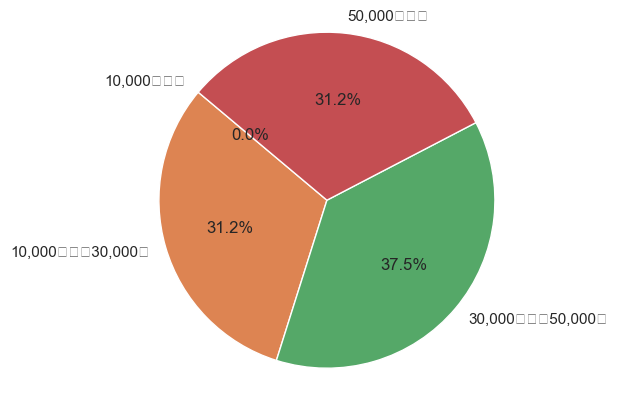

In [49]:
# 円グラフの描画
plt.pie(counts, labels=price_ranges, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # アスペクト比を保つために設定

In [50]:
plt.show()

In [57]:
# 考察：冷蔵庫を購入するにあたりアマゾンの情報をスクレイピングした。新品との差異を出した方が購入の参考になりそうなので今後比較できる内容で再実装したい。

In [ ]:
#　今回のスクレイピングは個人的な情報収集でのみ利用するために行っており、商用目的での利用は一切考慮しておりません。